In [12]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

path = "Data"
all_files = glob.glob(os.path.join(path, "*.csv"))
dfs = []

for file in all_files:
    df = pd.read_csv(file)
    dfs.append(df)

combined_df = pd.concat(dfs, axis=0, ignore_index=True)
combined_df.shape

#dfn = pd.read_csv('NOV.csv')
#dfd = pd.read_csv('DEC.csv')
#dfj = pd.read_csv('JAN.csv')
#dff = pd.read_csv('FEB.csv')
#dfm = pd.read_csv('MARCH.csv')
#dfa = pd.read_csv('APRL.csv')
#dfmy = pd.read_csv('MAY.csv')

#dfn.shape
#dfd.shape
#dfj.shape
#dff.shape
#dfm.shape
#dfa.shape
#dfmy.shape




C:\Users\ahmed\.conda\envs\pythonenvio\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(480500, 35)

In [13]:
combined_df.columns

Index(['coordinates', 'created_at', 'hashtags', 'media', 'urls',
       'favorite_count', 'id', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_user_id', 'lang', 'place',
       'possibly_sensitive', 'quote_id', 'retweet_count', 'retweet_id',
       'retweet_screen_name', 'source', 'text', 'tweet_url', 'user_created_at',
       'user_id', 'user_default_profile_image', 'user_description',
       'user_favourites_count', 'user_followers_count', 'user_friends_count',
       'user_listed_count', 'user_location', 'user_name', 'user_screen_name',
       'user_statuses_count', 'user_time_zone', 'user_urls', 'user_verified'],
      dtype='object')

In [14]:
x=combined_df['text']
x

0         @NoahHammer8 Calm down, half of the world's po...
1         Booster Dose Of Covid Vaccine Needed To Fight ...
2         @bitsofplastic @Eyeswideopen69 Zoe and ONS are...
3         @lxexmxc @NYCMayor What improves safety is bei...
4         @Nik0Mi @boulware_dr Of course.\nHowever, it s...
                                ...                        
480495    @badbbudy acho que apesar do título esdrúxulo ...
480496    Oigan! Ya tengo mi traje de Spiderman. ¿Ya est...
480497                         Fuck you Omicron\n\nFuck you
480498    praying this omicron shit blows over- I can’t ...
480499    How to mislead people. \n\nNew Zealand has no ...
Name: text, Length: 480500, dtype: object

In [15]:
# removing emojies using unicode  
def remove_emojis(text):
    emoji_pattern = re.compile(
        "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"  #various symbols
        u"\U000024C2-\U0001F251"  #miscellaneous symbols
        "]+",
        flags=re.UNICODE,
    )
    
    # Remove emojis using the pattern
    return emoji_pattern.sub(r"", text)

# testing it
text_with_emojis = "AIproject 🐍🎉"
text_without_emojis = remove_emojis(text_with_emojis)
print(text_without_emojis)


AIproject 


In [16]:
#text cleaning
def clean_tweet(tweet):
    #  URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    
    #  emojis
    tweet = remove_emojis(tweet)
    
    #  mentions, hashtags, and special characters
    tweet = re.sub(r'\@\w+|\#\w+|[^\w\s]', '', tweet)
    
    # convert to lowercase
    tweet = tweet.lower()
    
    # tokenize the tweet
    tokens = word_tokenize(tweet)
    
    # remove punctuation and stopwords
    tokens = [word for word in tokens if word not in string.punctuation and word not in stopwords.words('english')]
    
    # reconstruct the tweet
    cleaned_tweet = ' '.join(tokens)
    return cleaned_tweet


In [17]:
#dfn['cleaned_text'] = dfn['text'].apply(clean_tweet)
#dfd['cleaned_text'] = dfd['text'].apply(clean_tweet)
#dfj['cleaned_text'] = dfj['text'].apply(clean_tweet)
#dff['cleaned_text'] = dfd['text'].apply(clean_tweet)
#dfm['cleaned_text'] = dfm['text'].apply(clean_tweet)
#dfa['cleaned_text'] = dfa['text'].apply(clean_tweet)
#dfmy['cleaned_text'] = dfmy['text'].apply(clean_tweet)

#cleaning the text
combined_df['cleaned_text'] = combined_df['text'].apply(clean_tweet)

In [18]:
#sentimental analysis
SIA = SentimentIntensityAnalyzer()
combined_df['sentiment_score'] = combined_df['cleaned_text'].apply(lambda text: SIA.polarity_scores(text)['compound'])

# assigning labels to the scores of each analysis 
def get_sentiment_label(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

combined_df['sentiment_label'] = combined_df['sentiment_score'].apply(get_sentiment_label)


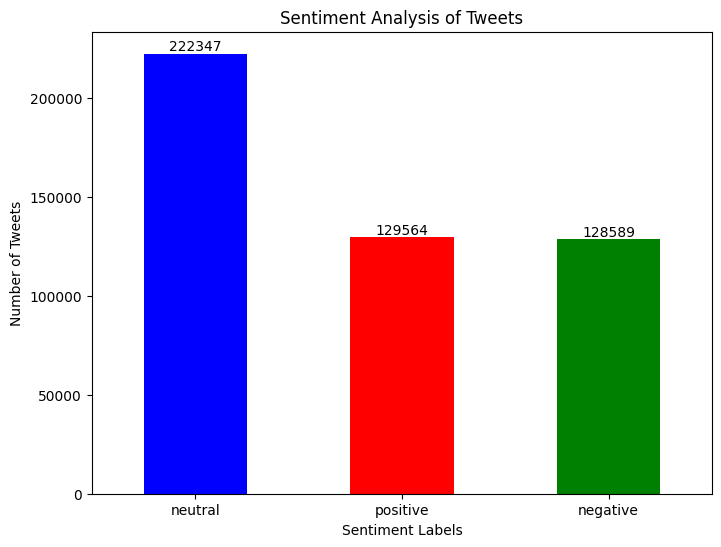

In [19]:
#plotting to visualize 
sentiment_counts = combined_df['sentiment_label'].value_counts()
ax = sentiment_counts.plot(kind='bar', color=['blue', 'red', 'green'], figsize=(8, 6))
plt.xlabel('Sentiment Labels')
plt.ylabel('Number of Tweets')
plt.title('Sentiment Analysis of Tweets')
plt.xticks(rotation=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom', fontsize=10)

plt.show()


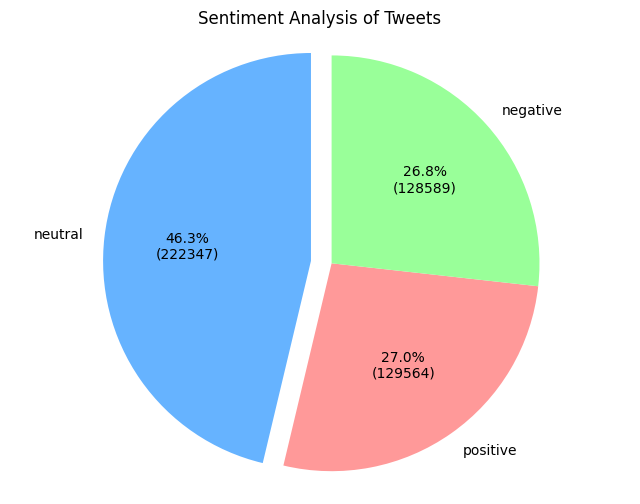

In [20]:
#another way for plotting
sentiment_counts = combined_df['sentiment_label'].value_counts()

colors = ['#66b3ff', '#ff9999', '#99ff99']
explode = (0.1, 0, 0)  
fig, ax = plt.subplots(figsize=(8, 6))
def custom_autopct(pct):
    total = sum(sentiment_counts)
    count = int(round(pct * total / 100.0))
    return f"{pct:.1f}%\n({count})"

ax.pie(sentiment_counts, labels=sentiment_counts.index, colors=colors, explode=explode, autopct=custom_autopct, startangle=90)
ax.axis('equal')
plt.title('Sentiment Analysis of Tweets')
plt.show()
